<div style="color: white; background-color: Black; font-size: 28px; font-weight: bold; text-align: center; padding: 20px;">
CUSTOMER PERSONALITY ANALYSIS
</div>


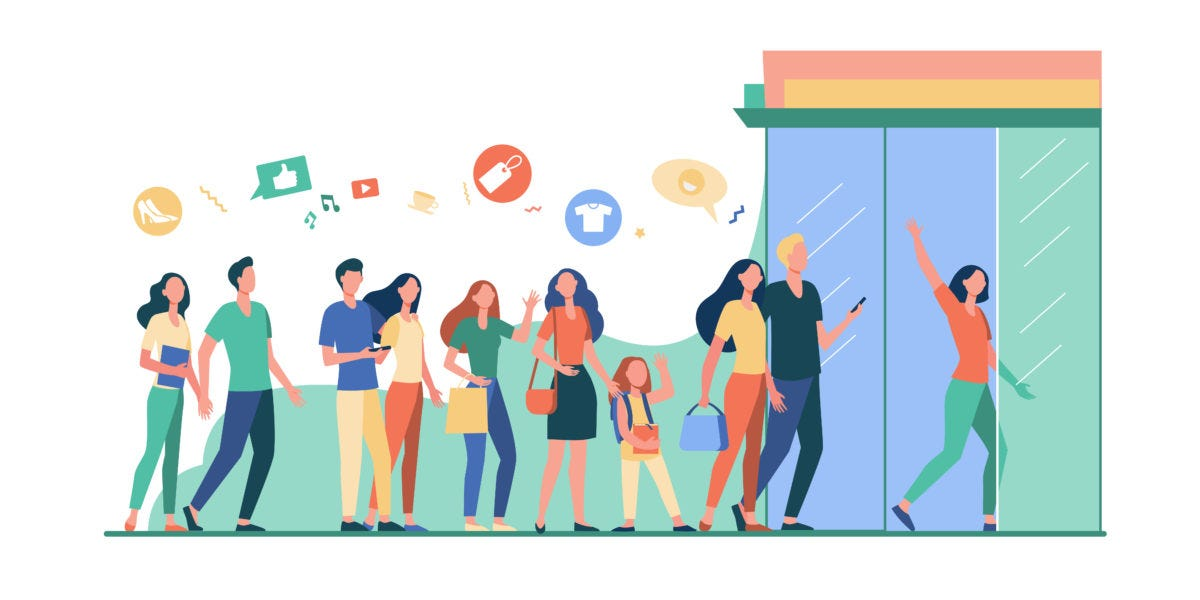!

### PROJECT PROCESS:

* IMPORT LIBARIES 
* DATA LOADING
* DATA CLEANING
* EXPLORATARY DATA ANALYSIS
* ENCODING
* SCALING
* PCA
* DBSCAN ALGORITHEM
* KMEAN ALGORITHEM
* AGGLOMERITIVE CLUSTERING
* AFFINITY PROPAGATION CLUSTERING


### IMPORT LIBARIES:

In [12]:
# General-purpose libraries
import numpy as np  # For numerical computations
import pandas as pd  # For data manipulation and analysis

# Visualization libraries
import matplotlib.pyplot as plt  # For creating plots and visualizations
import seaborn as sns  # For statistical data visualization

# Warning control
import warnings
warnings.filterwarnings("ignore")  # To suppress warnings

from sklearn.preprocessing import LabelEncoder,StandardScaler # For Encoding and Scaling

from sklearn.cluster import DBSCAN # For DBSCAN clustering

from sklearn.decomposition import PCA # For PCA use

from sklearn.cluster import KMeans # For Kmean Clustering

import scipy.cluster.hierarchy as sch # For dendrogram Vistualization

from sklearn.cluster import AgglomerativeClustering # For Agglomerative Clustering

from sklearn.metrics import silhouette_score # For silhoutte_score purpose

from sklearn.cluster import AffinityPropagation # For Affinity propagation Clustering


### DATA LOADING:

In [14]:
df=pd.read_excel(r"C:\Users\GCE PMNA\Downloads\marketing_campaign_tabular.xlsx")

In [15]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### COLUMN DESCRIPTIONS:

### DATA PREPROCESSING:

In [18]:
df.shape

(2240, 29)

In [19]:
df.size

64960

In [20]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [23]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

### DATA CLEANING:

In [25]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [26]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [27]:
df.shape

(2240, 29)

In [28]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [29]:
df.duplicated().sum()

0

In [30]:
df = df.drop_duplicates(keep='first')


In [31]:
df.duplicated().sum()

0

In [32]:
df.shape

(2240, 29)

In [33]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

### EXPLORATORY DATA ANALYSIS  (EDA):

#### COUNTPLOT

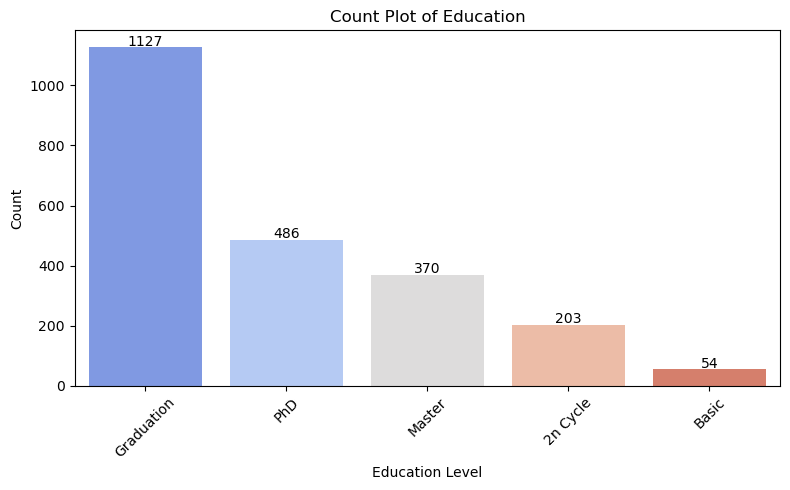

In [36]:
# Plot count plot for Education
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Education', order=df['Education'].value_counts().index, palette='coolwarm')
plt.title('Count Plot of Education')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add text labels on each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, int(height), ha="center", fontsize=10)

plt.tight_layout()
plt.show()

* The majority of customers (over 50%) are graduates. This suggests that mid-level education is the most common among our customer base. Less attention might be needed for PhDs or basic-educated groups unless their spending behavior is uniquely valuable.


#### HISTOGRAM 

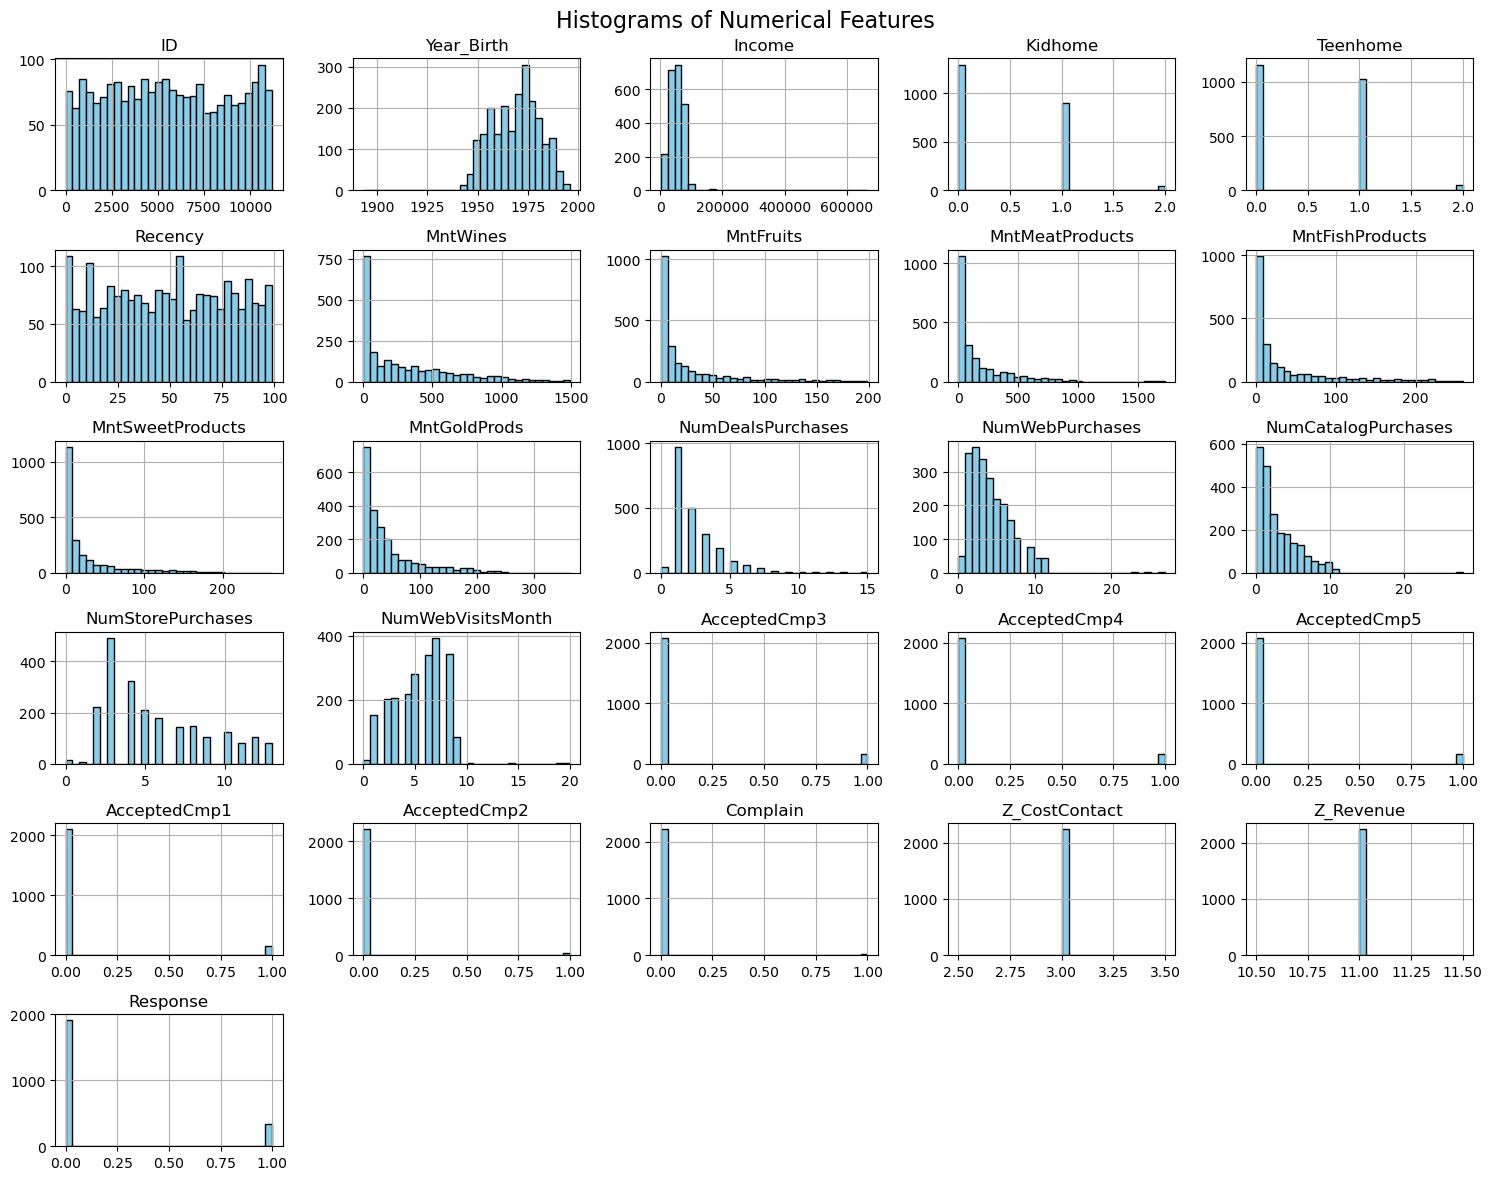

In [39]:
df.select_dtypes(include=['float64', 'int64']).hist(bins=30, figsize=(15, 12), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


* Most customers have an income between $30,000 and $60,000, but a small group earns significantly more. Wine spending also shows a peak near lower spending levels, indicating occasional rather than frequent buyers.

#### BOXPLOT

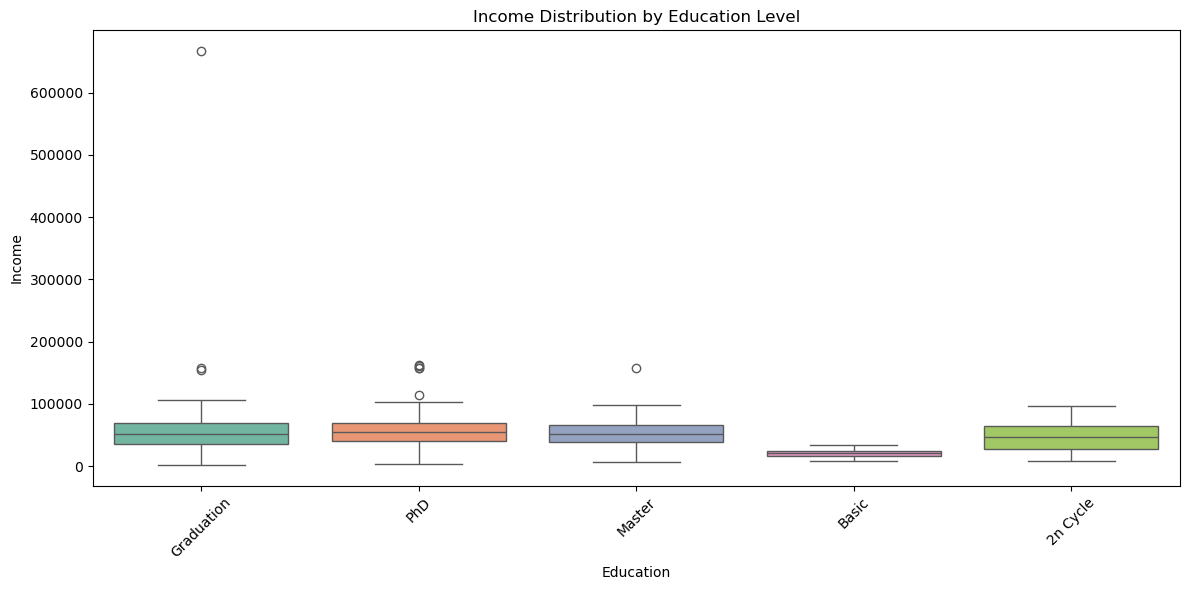

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Education', y='Income', palette='Set2')
plt.title('Income Distribution by Education Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Customers with a PhD or Master’s degree tend to have higher and more consistent income levels, while those with only Basic education show both lower median income and higher variability. This suggests education may be a strong predictor of purchasing power.

#### HEAT MAP

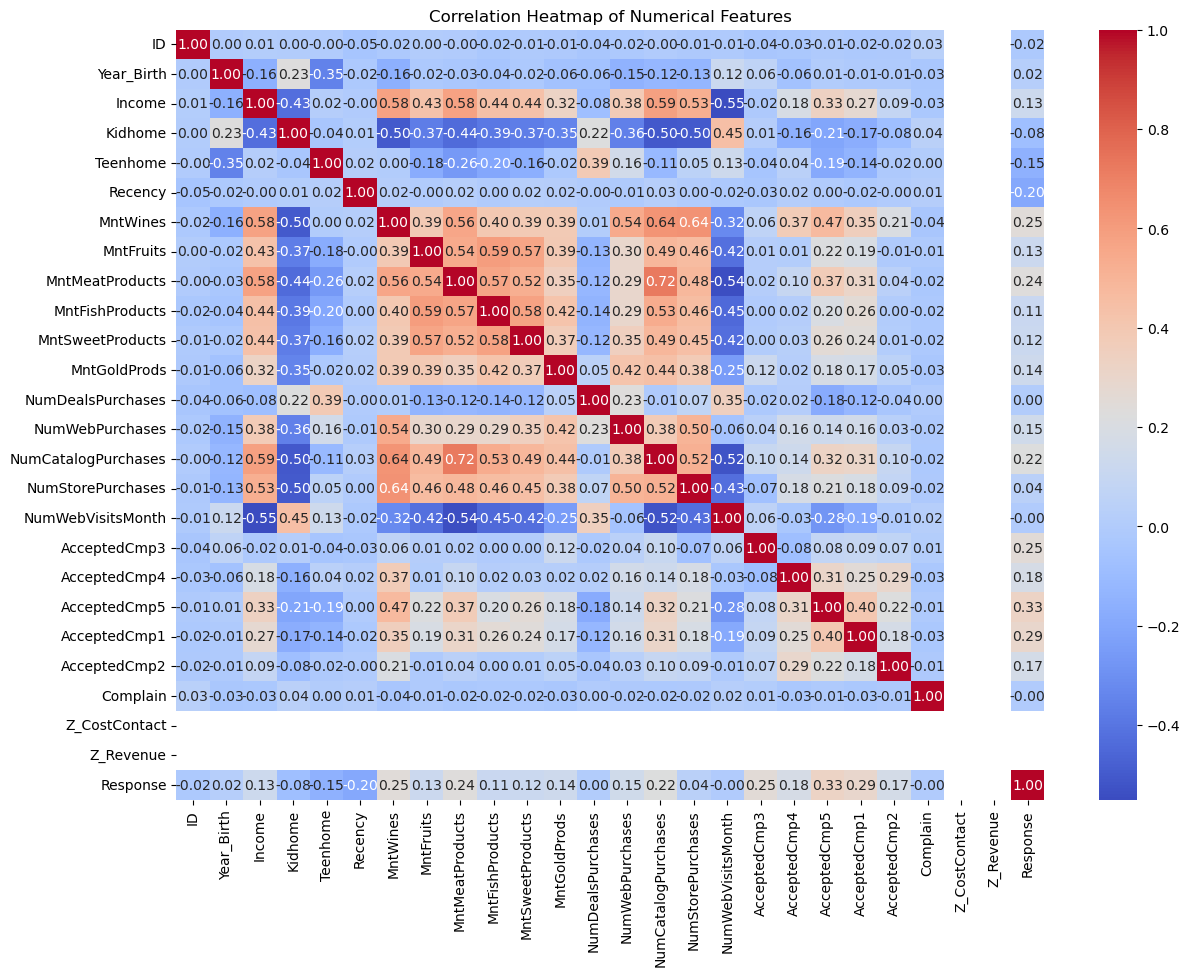

In [45]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

* Income shows a strong positive correlation with spending on wines, gold, and meat products, indicating that higher-income customers tend to spend more across luxury and food categories. Meanwhile, discount-related purchases are negatively correlated with income, suggesting budget-conscious behavior among lower earners.

#### PAIR PLOT

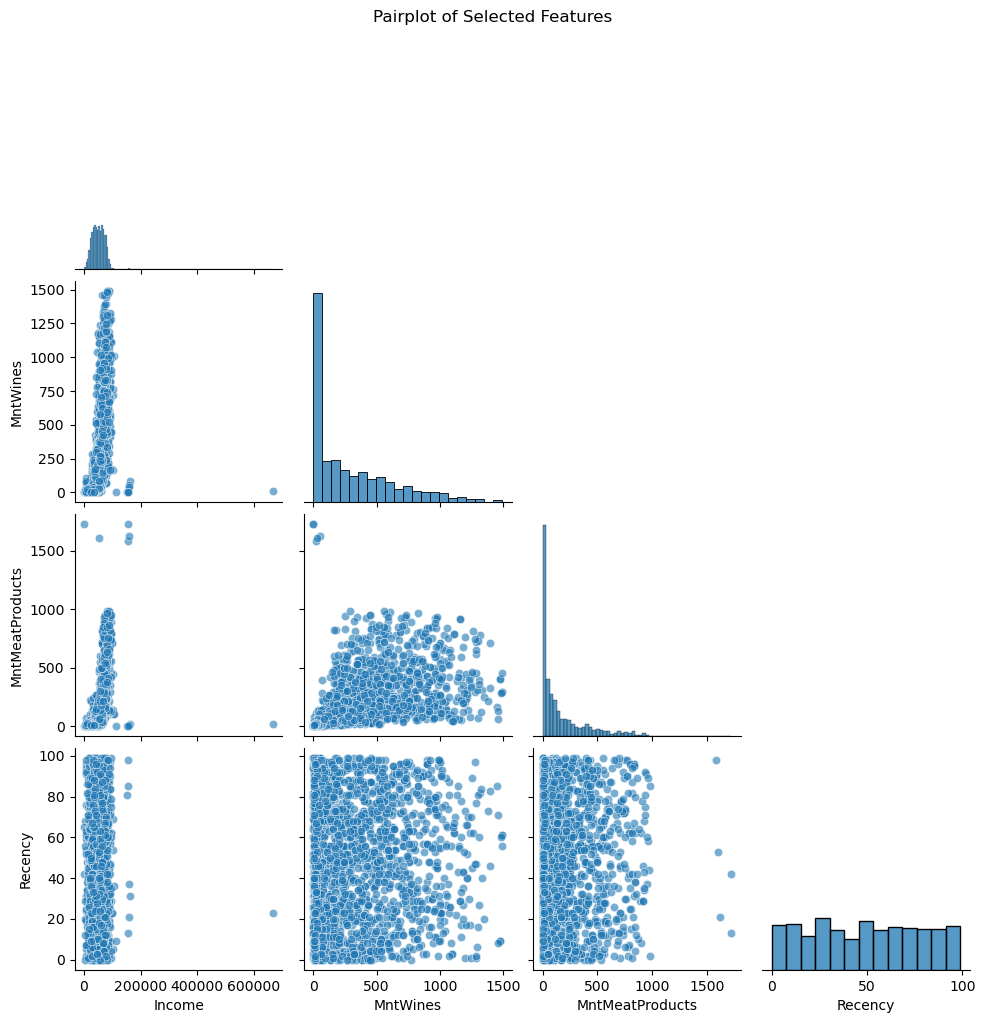

In [48]:
selected_features = ['Income', 'MntWines', 'MntMeatProducts', 'Recency']
sns.pairplot(df[selected_features], corner=True, plot_kws={'alpha':0.6})
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

* Customers with higher income tend to spend more on both wine and meat products, suggesting that income is a key driver of luxury food purchases. Additionally, low Recency (recent purchases) often aligns with higher spending, indicating active, valuable customers.

#### COUNT PLOT

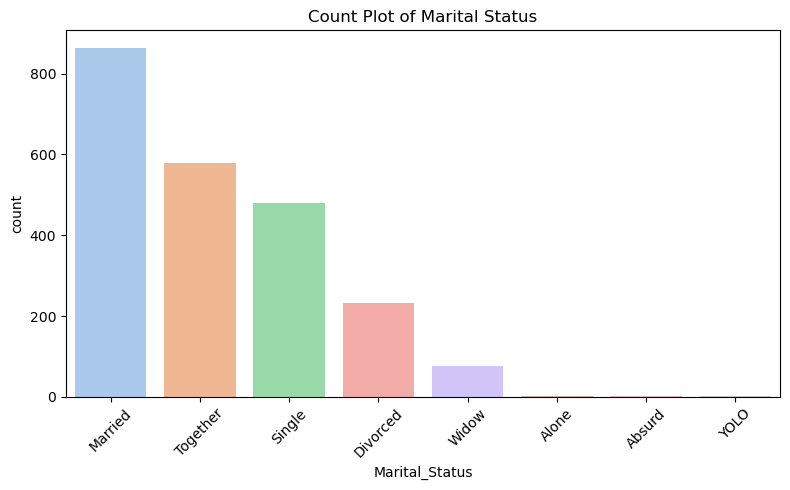

In [51]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Marital_Status', data=df, order=df['Marital_Status'].value_counts().index, palette='pastel')
plt.title('Count Plot of Marital Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* The majority of customers are either 'Married' or 'Together', indicating a high proportion of individuals in committed relationships. Single and divorced customers form smaller, but still notable groups, which could be targeted with personalized marketing strategies. This demographic insight is critical for crafting relevant offers.

#### VIOLIN PLOT

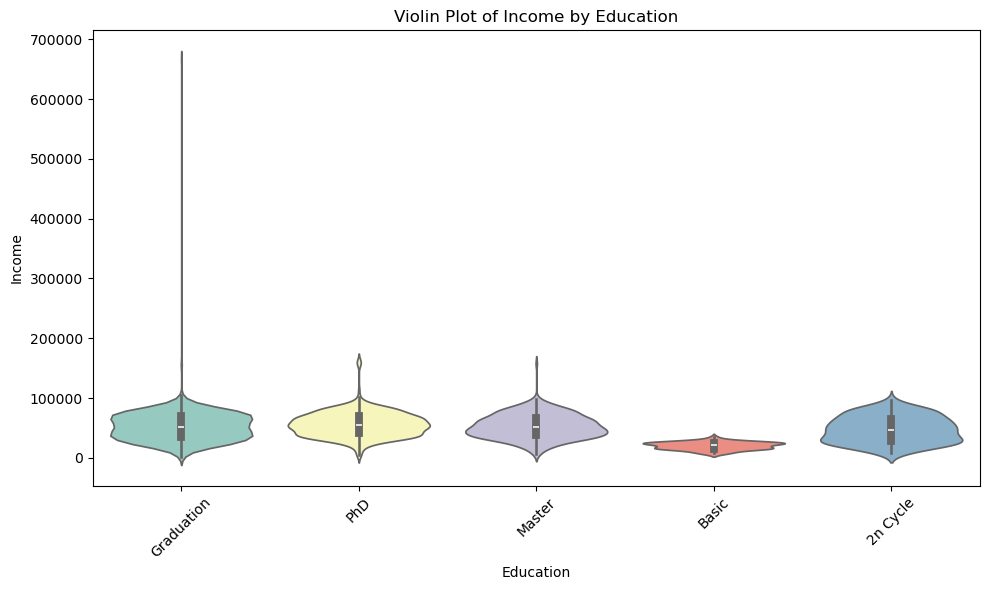

In [54]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Education', y='Income', palette='Set3')
plt.title('Violin Plot of Income by Education')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


* Customers with a PhD or Master's degree generally earn more, with a tighter and higher median income distribution. In contrast, those with Basic education show a wider spread and more skewness toward lower income levels. This suggests education is a strong indicator of purchasing power and may influence product preferences and marketing strategy.

#### PIE CHART

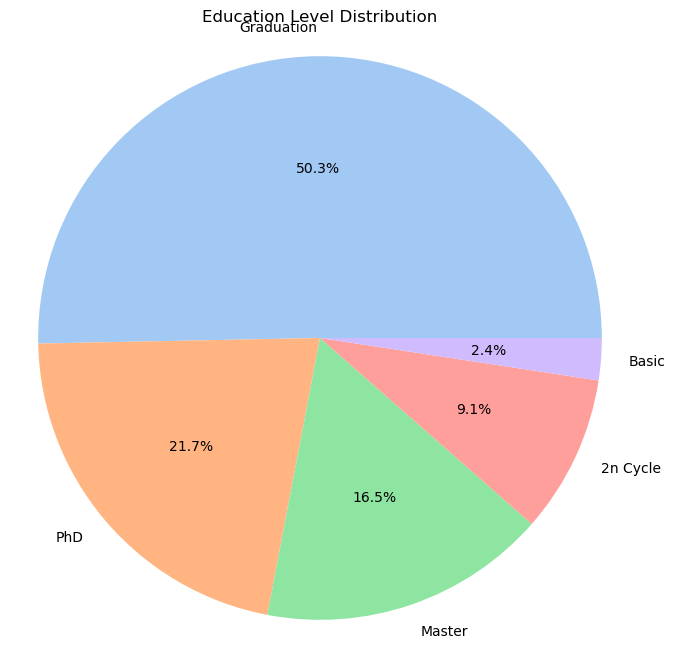

In [57]:
edu_counts = df['Education'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(edu_counts, labels=edu_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Education Level Distribution')
plt.axis('equal')
plt.show()

* Graduated and Master’s degree holders make up the majority of the customer base, accounting for over half of the population. This indicates a highly educated audience, which may be more receptive to high-end or knowledge-based product offerings. Basic and PhD levels form smaller portions, requiring more specialized approaches if targeted.

#### BAR CHART

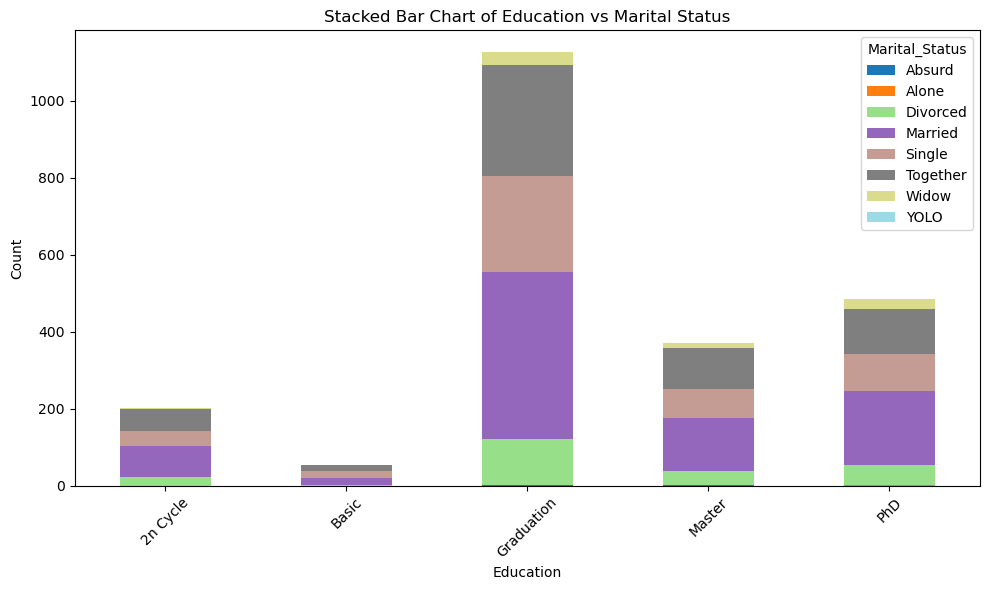

In [60]:
pd.crosstab(df['Education'], df['Marital_Status']).plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Stacked Bar Chart of Education vs Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Among customers with a Graduation or Master’s education, the majority are Married or in a relationship (Together), indicating that higher education is often associated with stable marital status in this dataset. In contrast, the 'Single' status is more prevalent among those with Basic education, suggesting different lifestyle and possibly consumption patterns. This cross-segmentation is valuable for personalized communication strategies.

In [62]:
df=df.drop(['ID','Dt_Customer'], axis=1)
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,46,709,43,182,...,5,0,0,0,0,0,0,3,11,0
2236,1946,PhD,Together,64014.0,2,1,56,406,0,30,...,7,0,0,0,1,0,0,3,11,0
2237,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,6,0,1,0,0,0,0,3,11,0
2238,1956,Master,Together,69245.0,0,1,8,428,30,214,...,3,0,0,0,0,0,0,3,11,0


### ENCODING:

In [64]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
df


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,2,4,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
1,1954,2,4,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
2,1965,2,5,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
3,1984,2,5,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
4,1981,4,3,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,2,3,61223.0,0,1,46,709,43,182,...,5,0,0,0,0,0,0,3,11,0
2236,1946,4,5,64014.0,2,1,56,406,0,30,...,7,0,0,0,1,0,0,3,11,0
2237,1981,2,2,56981.0,0,0,91,908,48,217,...,6,0,1,0,0,0,0,3,11,0
2238,1956,3,5,69245.0,0,1,8,428,30,214,...,3,0,0,0,0,0,0,3,11,0


### SCALING:

In [66]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

data_scaled=pd.DataFrame(data_scaled,columns=df.columns)

data_scaled

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,-0.985345,-0.350141,0.251004,0.235327,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,...,0.693904,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,2.388846
1,-1.235733,-0.350141,0.251004,-0.235826,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,...,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
2,-0.317643,-0.350141,1.180340,0.773633,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,...,-0.542647,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
3,1.268149,-0.350141,1.180340,-1.022732,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,...,0.281720,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
4,1.017761,1.428354,-0.678332,0.241519,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,...,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,-0.150717,-0.350141,-0.678332,0.358568,-0.825218,0.906934,-0.107383,1.203678,0.419916,0.066692,...,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
2236,-1.903435,1.428354,1.180340,0.470064,2.890335,0.906934,0.237969,0.303291,-0.661449,-0.606873,...,0.693904,-0.28014,-0.283830,-0.28014,3.815174,-0.11651,-0.097282,0.0,0.0,-0.418612
2237,1.017761,-0.350141,-1.607669,0.189106,-0.825218,-0.929894,1.446700,1.795020,0.545656,0.221789,...,0.281720,-0.28014,3.523233,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
2238,-1.068807,0.539106,1.180340,0.679035,-0.825218,0.906934,-1.419719,0.368666,0.092992,0.208495,...,-0.954831,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612


### PCA (Principal Component Analysis):

* PCA was used to reduce dimensionality and visualize the structure of the dataset, enhancing clustering performance.

In [69]:
pca=PCA(n_components=2)
x_reduced=pca.fit_transform(data_scaled)

In [70]:
x_reduced

array([[ 3.7610792 , -0.30146172],
       [-2.37419329,  0.18795822],
       [ 1.62337961, -0.17121445],
       ...,
       [ 1.45415017,  0.09531352],
       [ 1.77750355,  1.26975876],
       [-1.65347197,  1.25641107]])

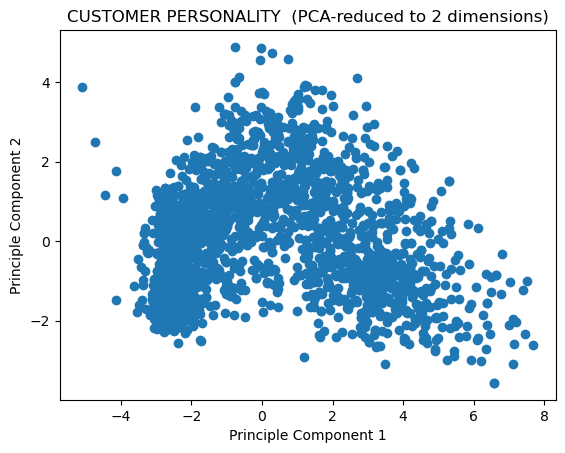

In [71]:
plt.scatter(x_reduced[:,0],x_reduced[:,1])
plt.title("CUSTOMER PERSONALITY  (PCA-reduced to 2 dimensions)")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

### DBSCAN(Density-Based Spatial Clustering of Applications with Noise):

* DBSCAN effectively identified noise and outlier customers and grouped customers in dense clusters

In [74]:
epsilon=1.5
min_samples=5
dbscan=DBSCAN(eps=epsilon,min_samples=min_samples)
labels=dbscan.fit_predict(x_reduced)

In [75]:
np.unique(labels)


array([-1,  0], dtype=int64)

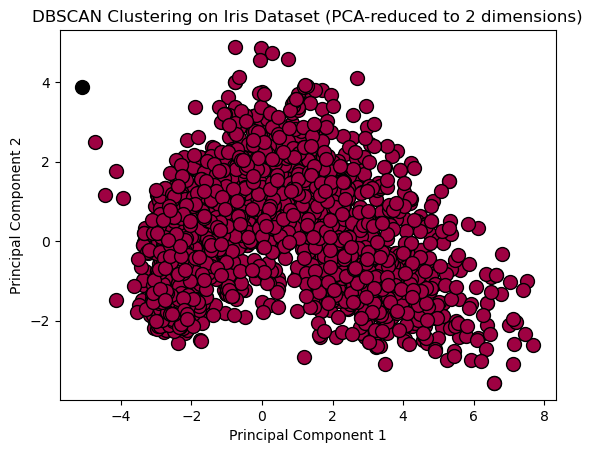

In [76]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  

    class_member_mask = (labels == k)    #Creates a boolean array to identify points that belong to cluster k.
    xy = x_reduced[class_member_mask]    #Apply the mask to X_reduced to get all data points in cluster k.
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)
plt.title("DBSCAN Clustering on Iris Dataset (PCA-reduced to 2 dimensions)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [77]:
sil_ahc=silhouette_score(x_reduced,labels)

In [78]:
sil_ahc

0.4356252267706555

### KMEAN CLUSTERING:

* The K-Means algorithm effectively segmented the customers in the marketing dataset into distinct and meaningful groups based on purchasing behavior and demographic characteristics.

  File "C:\Users\GCE PMNA\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


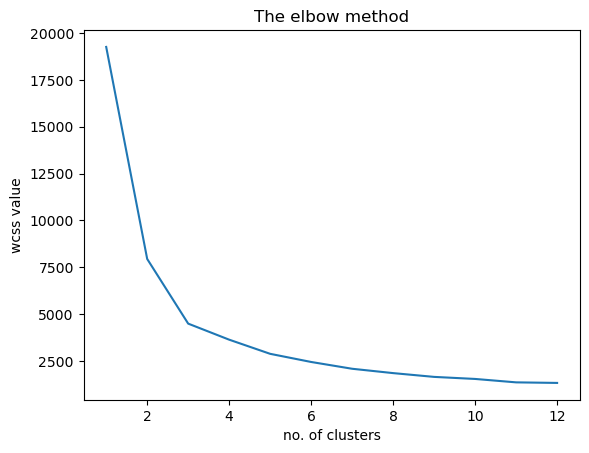

In [81]:
wcss = []
for i in range(1,13):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)    
    kmeans.fit(x_reduced)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,13),wcss)
plt.title('The elbow method')
plt.xlabel('no. of clusters')
plt.ylabel('wcss value')
plt.show()

In [170]:
kmeans=KMeans(n_clusters=3  ,init='k-means++',random_state=42)#random initialization method
y_kmeans=kmeans.fit_predict(x_reduced)

In [172]:
y_kmeans

array([1, 0, 1, ..., 2, 2, 0])

In [174]:
unique_labels = set(y_kmeans)

In [176]:
unique_labels

{0, 1, 2}

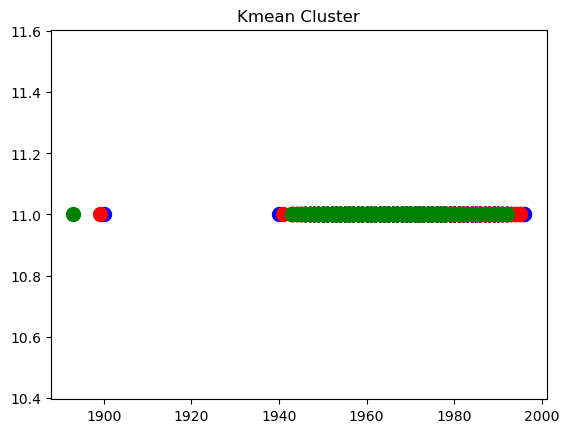

In [178]:
plt.scatter(df[y_kmeans==0,0],df[y_kmeans==0,1],s=100,c='blue',label='cluster1')
plt.scatter(df[y_kmeans==1,0],df[y_kmeans==1,1],s=100,c='red',label='cluster2')
plt.scatter(df[y_kmeans==2,0],df[y_kmeans==2,1],s=100,c='green',label='cluster3')
plt.title('Kmean Cluster')
plt.show()

In [180]:
sil_ahc=silhouette_score(x_reduced,y_kmeans)

In [182]:
sil_ahc

0.5028946161938553

### AGGLOMERITIVE CLUSTERING:


* Agglomerative Clustering, a type of hierarchical clustering, was successfully applied to segment the customers in the marketing dataset. This method builds clusters step-by-step by merging the most similar data points, which results in a tree-like structure called a dendrogram.

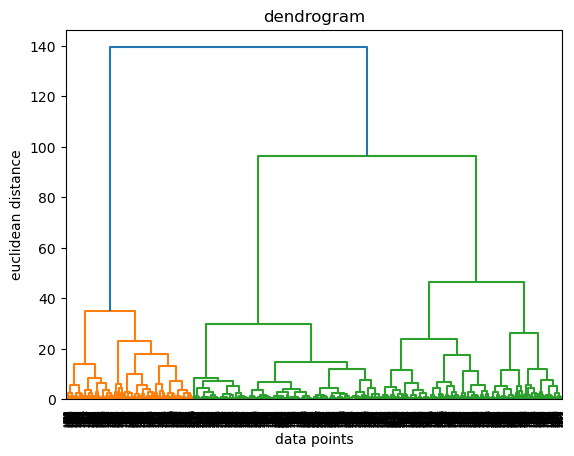

In [194]:
dendrogram=sch.dendrogram(sch.linkage(x_reduced,method='ward'))
plt.title('dendrogram')
plt.xlabel('data points')
plt.ylabel('euclidean distance')
plt.show()

In [196]:
ahc=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
y_ahc=ahc.fit_predict(x_reduced)
y_ahc

array([1, 2, 1, ..., 1, 0, 0], dtype=int64)

In [198]:
sil_ahc=silhouette_score(x_reduced,y_ahc)
sil_ahc

0.4655886692712571